# EXPLORATORY DATA ANALYSIS (EDA)

## Chapter 2 Methodology Note

According to Chapter 2 of HOML: "Before you look at the data any further, you need to create a test set, put it aside, and never look at it."

**Important:** 
- This EDA notebook explores the full dataset for initial understanding
- The test set (20% split) is created in `src/data_preparation.py` before model training
- Test set is only used for final model evaluation (not during EDA or training)
- This follows the Chapter 2 methodology: test set created early and set aside

## Step 3.1 — Load the Dataset

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("smart_study_planner_dataset.csv")

# Basic info
print("Dataset shape:", df.shape)
print("\nColumns:")
print(df.columns)

df.head()

Dataset shape: (1000, 7)

Columns:
Index(['course_difficulty', 'credit_hours', 'days_until_exam',
       'previous_grade', 'daily_available_hours', 'number_of_courses',
       'required_study_hours'],
      dtype='object')


,course_difficulty,credit_hours,days_until_exam,previous_grade,daily_available_hours,number_of_courses,required_study_hours
0,4,5,92,57,4.9,5,25.40
1,5,5,71,86,2.0,5,14.00
2,3,5,32,81,4.6,7,23.32
3,5,5,11,97,4.1,5,28.70
4,5,6,10,92,5.5,4,37.35


## Step 3.2 — Dataset Structure & Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   course_difficulty      1000 non-null   int64  
 1   credit_hours           1000 non-null   int64  
 2   days_until_exam        1000 non-null   int64  
 3   previous_grade         1000 non-null   int64  
 4   daily_available_hours  1000 non-null   float64
 5   number_of_courses      1000 non-null   int64  
 6   required_study_hours   1000 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


## Step 3.3 — Descriptive Statistics

In [5]:
df.describe()

,course_difficulty,credit_hours,days_until_exam,previous_grade,daily_available_hours,number_of_courses,required_study_hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,3.004000,3.979000,59.228000,75.383000,3.59450,5.584000,18.011590
std,1.433192,1.429196,35.554495,14.514096,1.41654,1.681003,5.943767
min,1.000000,2.000000,1.000000,50.000000,1.00000,3.000000,7.000000
25%,2.000000,3.000000,27.000000,63.000000,2.40000,4.000000,14.000000
50%,3.000000,4.000000,59.000000,76.000000,3.60000,6.000000,17.925000
75%,4.000000,5.000000,90.000000,87.000000,4.80000,7.000000,21.685000
max,5.000000,6.000000,120.000000,100.000000,6.00000,8.000000,41.300000


## Step 3.4 — Distribution of Target Variable

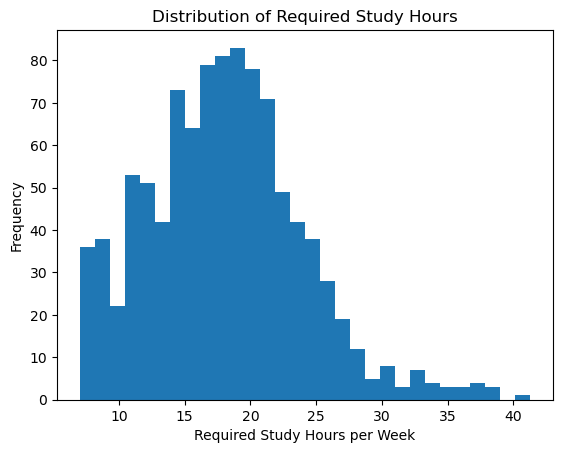

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["required_study_hours"], bins=30)
plt.xlabel("Required Study Hours per Week")
plt.ylabel("Frequency")
plt.title("Distribution of Required Study Hours")
plt.show()

## Step 3.5 — Feature Distributions (Input Understanding)

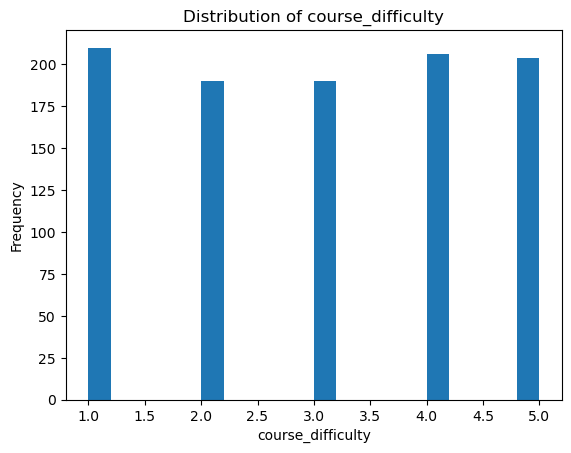

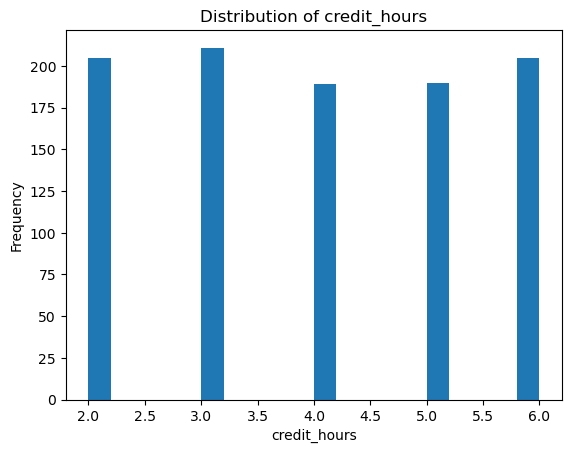

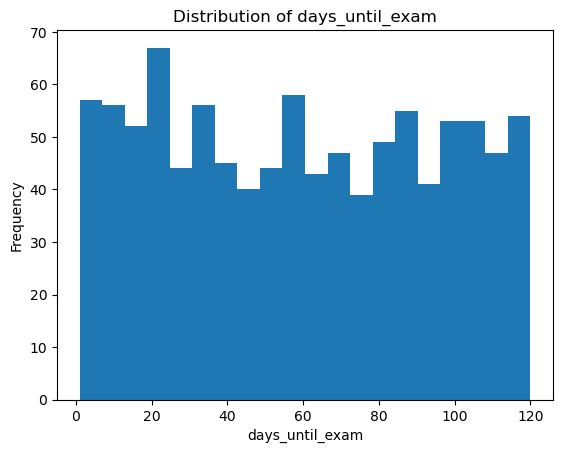

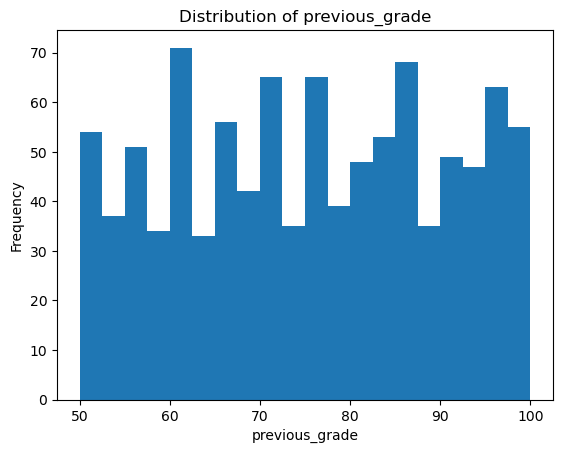

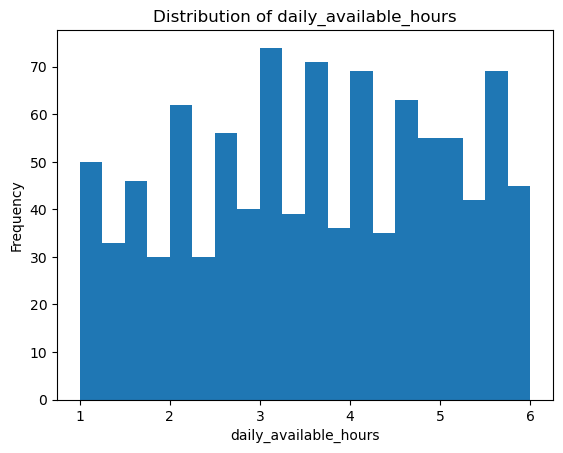

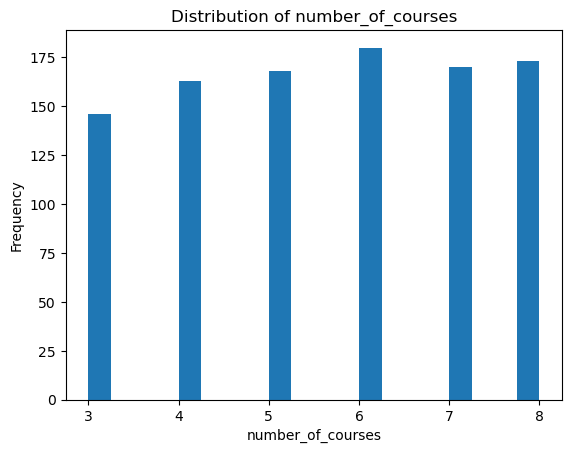

In [9]:
features = [
    "course_difficulty",
    "credit_hours",
    "days_until_exam",
    "previous_grade",
    "daily_available_hours",
    "number_of_courses"
]

for feature in features:
    plt.figure()
    plt.hist(df[feature], bins=20)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature}")
    plt.show()


## Step 3.6 — Correlation Analysis

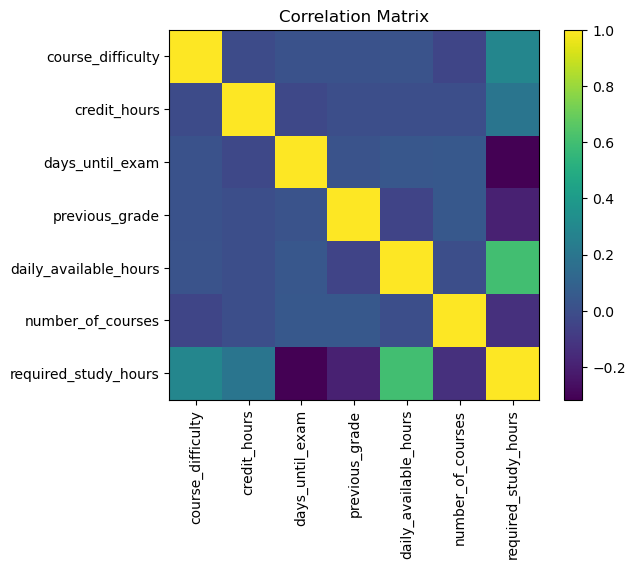

required_study_hours     1.000000
daily_available_hours    0.603791
course_difficulty        0.289347
credit_hours             0.197556
number_of_courses       -0.134781
previous_grade          -0.194653
days_until_exam         -0.316558
Name: required_study_hours, dtype: float64

In [10]:
correlation_matrix = df.corr()

plt.figure()
plt.imshow(correlation_matrix)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.show()

correlation_matrix["required_study_hours"].sort_values(ascending=False)

## STEP 3.7 — KEY INSIGHTS SUMMARY

Exploratory data analysis shows that the target variable, required study hours per week, has a continuous distribution with sufficient variability, making it suitable for a regression-based approach. Correlation analysis indicates that daily available study hours has the strongest positive relationship with required study time, followed by course difficulty and credit hours.

Negative correlations were observed with previous grade and days until exam, suggesting that students with lower academic performance and closer exam dates tend to increase their weekly study effort. The number of courses shows a weak negative relationship, reflecting limited available time as course load increases.

Since the relationships between features and the target variable are not strictly linear, the use of tree-based and ensemble regression models is well justified.